In [1]:
import argparse
import pdb

from builder import build
from util import DEFAULTS

In [2]:
# Parse arguments
parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

# General arguments
parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
parser.set_defaults(unnamed_objects=True)

# Tensorflow arguments
parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

parser.add_argument('--experiment', dest='experiment', action='store_true')

parser.add_argument("--f", type=str, default='abc.def')


args = parser.parse_args()
args = vars(args)

In [14]:
args['problem'] = 'example_test.smt2'

args['n_tries'] = 10
args['eps'] = 1e-4
args['n_iterations'] = 10000

lines = open(args['problem'], 'r').readlines()
args['lines'] = ['(param (A B C) triangle)']

args['lines']

['(param (A B C) triangle)']

In [18]:
res = build(args)

Processing instructions...: 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]

INPUT INSTRUCTIONS:
sample (A B C) triangle ()


Processing instructions...: 100%|██████████| 1/1 [00:00<00:00,  5.67it/s]




Found 1 models


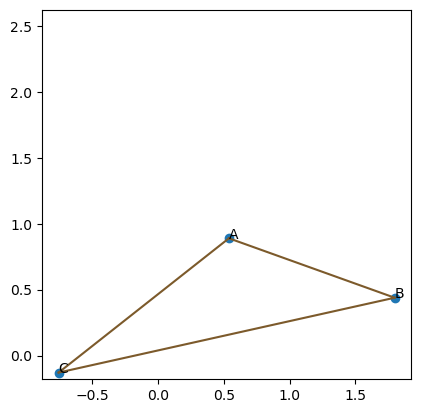

In [17]:
res[1][0].plot()

In [ ]:
for item in res[0]:
    print(item)

(param A point)
(param B point)
(define O point (midp A B))
(define circle_O circle (diam A B))
(param S point (on-ray B A))
(param C point (on-circ circle_O))
(assert (perp (line O C) (line S C)))
(assert (= (uangle B S C) (div pi 6)))


In [ ]:
for obj_name, obj in res[1][0].named_points.items():
    print(obj_name)
    print(obj)
    (x, y) = obj

for obj_name, obj in res[1][0].named_lines.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj
    # slope = y/x, intercept = r

for obj_name, obj in res[1][0].named_circles.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj

A
(coords -0.161407 0.177885)
B
(coords -0.143542 -0.401606)
O
(coords -0.152475 -0.111861)
S
(coords -0.170406 0.469775)
C
(coords -0.407444 0.026063)
circle_O
CircleNF(center=TfPoint(x=-0.15247471993888645, y=-0.11186077383137494), radius=0.2898830659905043)


In [ ]:
for item in res[1][0]:
    print(item)

{<primitives.Point object at 0x000001D8CF331850>: TfPoint(x=-0.1614070837095692, y=0.1778846399813777), <primitives.Point object at 0x000001D8CF3317C0>: TfPoint(x=-0.14354235616820368, y=-0.4016061876441276), <primitives.Point object at 0x000001D8CF3317F0>: TfPoint(x=-0.15247471993888645, y=-0.11186077383137494), <primitives.Point object at 0x000001D8CD94BB50>: TfPoint(x=-0.17040556781690216, y=0.469774846012181), <primitives.Point object at 0x000001D8CD94BF10>: TfPoint(x=-0.4074438697609302, y=0.026062844838812493)}
{}
{<primitives.Circle object at 0x000001D8CD8F0B80>: CircleNF(center=TfPoint(x=-0.15247471993888645, y=-0.11186077383137494), radius=0.2898830659905043)}
[]
[]
[]
[LineNF(n=TfPoint(x=0.4757905336723098, y=0.8795586211662182), r=-0.17093413636496907), LineNF(n=TfPoint(x=-0.8820292568107065, y=0.4711946414486829), r=0.3716580864662685)]
[]
{}
{}
